In [348]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import data
data = pd.read_csv('rides_data.csv')
data = data.drop(['Base'], 1)
datetimes = data['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data['dayofweek']=dayofweek
data['hour']=hour
df = data.drop(['Date/Time'], 1)
y=df.drop('dayofweek', 1).drop('hour', 1)
x=df.drop('Lat', 1).drop('Lon', 1)
y.head()
print(y.size)

2056272


In [351]:
data1 = pd.read_csv('uber-raw-data-apr14.csv')
data1 = data1.drop(['Base'], 1)
datetimes = data1['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data1['dayofweek']=dayofweek
data1['hour']=hour
df1 = data1.drop(['Date/Time'], 1)
df1.describe()
y1= df1.drop('dayofweek', 1).drop('hour', 1)
x1=df1.drop('Lat', 1).drop('Lon', 1)
y1.head()
print(y1.size)

1129032


In [352]:
data2 = pd.read_csv('uber-raw-data-aug14.csv')
data2 = data2.drop(['Base'], 1)
datetimes = data2['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data2['dayofweek']=dayofweek
data2['hour']=hour
df2 = data2.drop(['Date/Time'], 1)
df2.describe()
y2= df2.drop('dayofweek', 1).drop('hour', 1)
x2=df2.drop('Lat', 1).drop('Lon', 1)
y2.head()
print(y2.size)

1658550


In [353]:
data3 = pd.read_csv('uber-raw-data-jul14.csv')
data3 = data3.drop(['Base'], 1)
datetimes = data3['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data3['dayofweek']=dayofweek
data3['hour']=hour
df3 = data3.drop(['Date/Time'], 1)
df3.describe()
y3= df3.drop('dayofweek', 1).drop('hour', 1)
x3=df3.drop('Lat', 1).drop('Lon', 1)
y3.head()
print(y3.size)

1592242


In [354]:
data4 = pd.read_csv('uber-raw-data-jun14.csv')
data4 = data4.drop(['Base'], 1)
datetimes = data4['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data4['dayofweek']=dayofweek
data4['hour']=hour
df4 = data4.drop(['Date/Time'], 1)
df4.describe()
y4= df4.drop('dayofweek', 1).drop('hour', 1)
x4=df4.drop('Lat', 1).drop('Lon', 1)
y4.head()
print(y4.size)

1327688


In [355]:
data5 = pd.read_csv('uber-raw-data-may14.csv')
data5 = data5.drop(['Base'], 1)
datetimes = data5['Date/Time']
dayofweek = []
hour = []
for s in datetimes:
    day = int(s.split('/')[1])%7
    dayofweek.append(day)
    time = int(s.split()[1].split(':')[0])*60+(int(s.split()[1].split(':')[1]))
    hour.append(time)
data5['dayofweek']=dayofweek
data5['hour']=hour
df5 = data5.drop(['Date/Time'], 1)
df5.describe()
y5= df5.drop('dayofweek', 1).drop('hour', 1)
x5=df5.drop('Lat', 1).drop('Lon', 1)
y5.head()
print(y5.size)

1304870


In [356]:
xmaster = pd.concat([x,x1,x2,x3, x4, x5])
ymaster = pd.concat([y,y1,y2,y3, y4, y5])
ymaster.shape

(4534327, 2)

In [357]:
print(xmaster[0:4200000].size)

8400000


In [371]:
# print(xmaster[0:3000000])
xtrain=xmaster[0:1000000]
ytrain=ymaster[0:1000000]
xtest=xmaster[1000000:1050000]
ytest=ymaster[1000000:1050000]
xtest.size

100000

In [372]:
from __future__ import print_function
from keras.layers import Input, Concatenate, Dense, Activation, LSTM, Embedding
from keras.models import Sequential, Model
from sklearn import preprocessing
import numpy as np

input_tensor = Input(shape=(2,))
#x = Embedding(output_dim=512, input_dim=None)(input_tensor)
#x = LSTM(24443,)(input_tensor)
intermediate = Dense(500, activation='relu')(input_tensor)
# x = Dense(500, activation='tanh')(x)
output_tensor = Dense(2)(intermediate)

model = Model(input_tensor, output_tensor)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(xtrain, ytrain, epochs=10)

# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(xtrain, ytrain, epochs=400)

# model.get_weights()

Epoch 1/10
1000000/1000000 [==============================] - 82s 82us/step - loss: 14.1650
Epoch 2/10
1000000/1000000 [==============================] - 74s 74us/step - loss: 1.0741
Epoch 3/10
1000000/1000000 [==============================] - 75s 75us/step - loss: 0.6410
Epoch 4/10
1000000/1000000 [==============================] - 76s 76us/step - loss: 0.4124
Epoch 5/10
1000000/1000000 [==============================] - 76s 76us/step - loss: 0.3400
Epoch 6/10
1000000/1000000 [==============================] - 75s 75us/step - loss: 0.2692
Epoch 7/10
1000000/1000000 [==============================] - 70s 70us/step - loss: 0.2216
Epoch 8/10
1000000/1000000 [==============================] - 72s 72us/step - loss: 0.1922
Epoch 9/10
1000000/1000000 [==============================] - 70s 70us/step - loss: 0.1797
Epoch 10/10
1000000/1000000 [==============================] - 76s 76us/step - loss: 0.1613


In [366]:
forecast = model.predict(xtest)
print(forecast)

[[ 42.08129 -76.10826]
 [ 42.08129 -76.10826]
 [ 42.08129 -76.10826]
 ...
 [ 42.38156 -76.2602 ]
 [ 42.38442 -76.26331]
 [ 42.38442 -76.26331]]


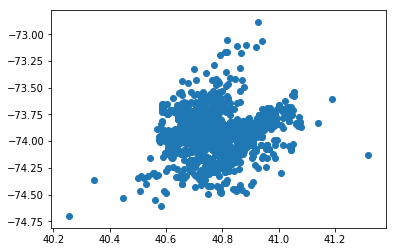

In [369]:
import matplotlib.pyplot as plt
plt.scatter(ytest[['Lat']], ytest[['Lon']])
plt.show()

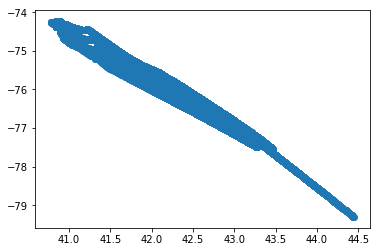

In [367]:
plt.scatter(forecast[:,0], forecast[:,1])
plt.show()